In [1]:
#Data manipulation imports
import pandas as pd
import numpy as np 


In [2]:
#Data Visulization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the csv file
df=pd.read_csv(r'C:\Users\Ramachandra M\Documents\Capstone_project\911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [7]:
#top 5 zip codes
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [8]:
#top 5 townships
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [9]:
#total unique value count for titles
df['title'].nunique()
#or
len(df['title'].unique())

110

In [10]:
#create a column and split the title based on the naming category
df['reason']=df['title'].apply(lambda title: title.split(":")[0])

In [11]:
# x=df['title'].iloc[0]
# x.split(":")[0]

In [12]:
#make a count of the reason column created
df['reason'].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

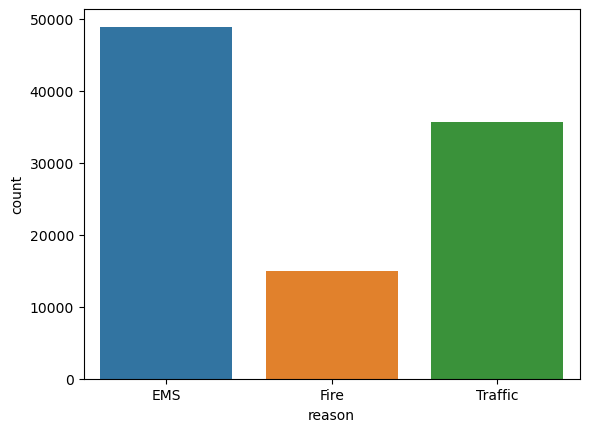

In [13]:
#draw a count plot of the reasons
sns.countplot(x='reason',data=df)

In [14]:
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
reason        object
dtype: object

In [15]:
#identify the data type of a specific column value
type(df['timeStamp'].iloc[0])

str

In [16]:
#Convert the data type of timestamp from string to DateTime
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [17]:
#seperate the hour, month, day of the week from the timeStamp columns
df['Hour']=df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)

In [18]:
df['Month']=df['timeStamp'].apply(lambda timeStamp:timeStamp.month)

In [19]:
df['Day of Week']=df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [21]:
#create a reference for the Day of the week column
dmap={0:'Mon',
      1:'Tue',
      2:'Wed',
      3:'Thu',
      4:'Fri',
      5:'Sat',
      6:'Sun'}

In [22]:
#assign the value created to the Day of the week
df['Day of Week']=df['Day of Week'].map(dmap)

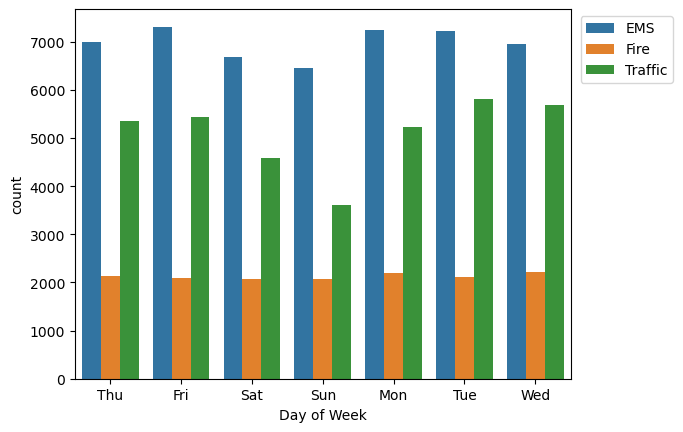

In [23]:
#plot a graph and adjust the legend according to the fit
sns.countplot(x='Day of Week',hue='reason',data=df)
plt.legend(loc=(1.02,0.8))

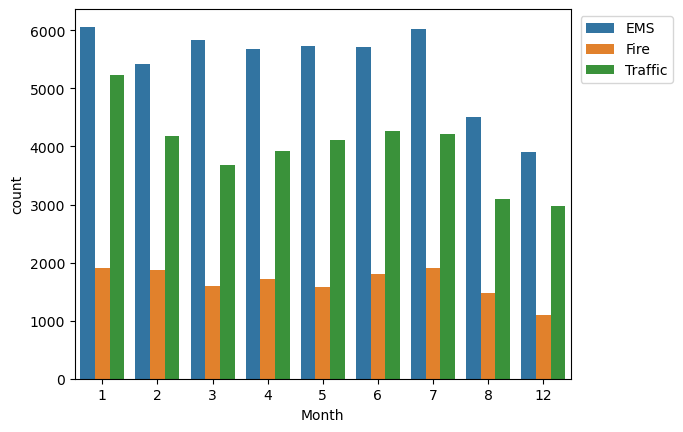

In [24]:
#plot a graph and adjust the legend according to the fit
sns.countplot(x='Month',hue='reason',data=df)
plt.legend(loc=(1.02,0.8))

In [26]:
bymonth=df.groupby('Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<Axes: xlabel='Month'>

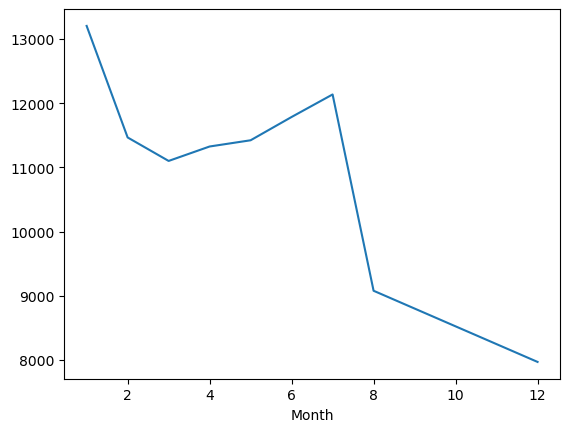

In [47]:
#to see the trending of the missing months from the above graphs
bymonth['lat'].plot()

In [48]:
#reset the index created for the above graph
bymonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


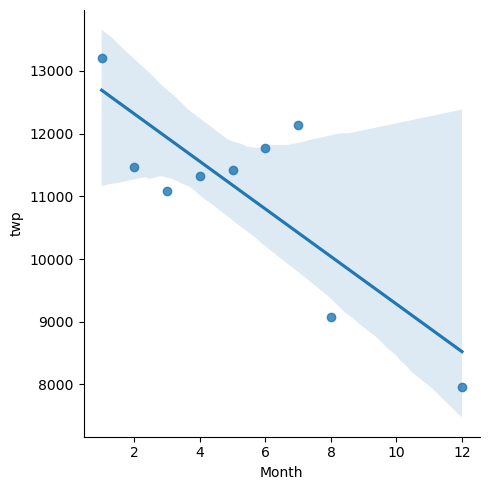

In [55]:
#reset the index that created and plot the LMPLOT graph
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())


In [56]:
#create a column date and remove the timestamp from the datetime column
df['Date']=df['timeStamp'].apply(lambda x: x.date())

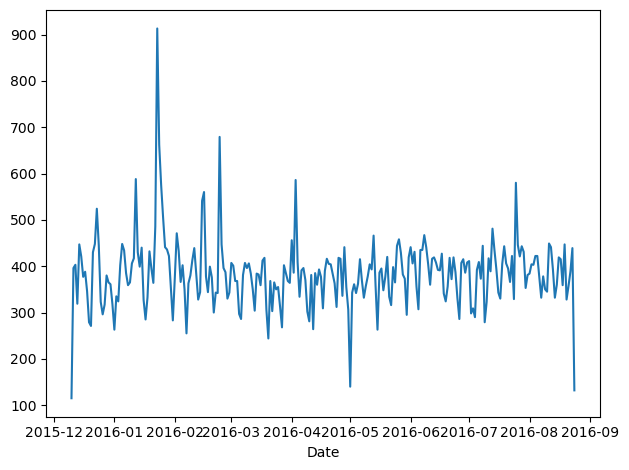

In [64]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()  #fix the merging x-axis

In [68]:
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

Text(0.5, 1.0, 'Traffic')

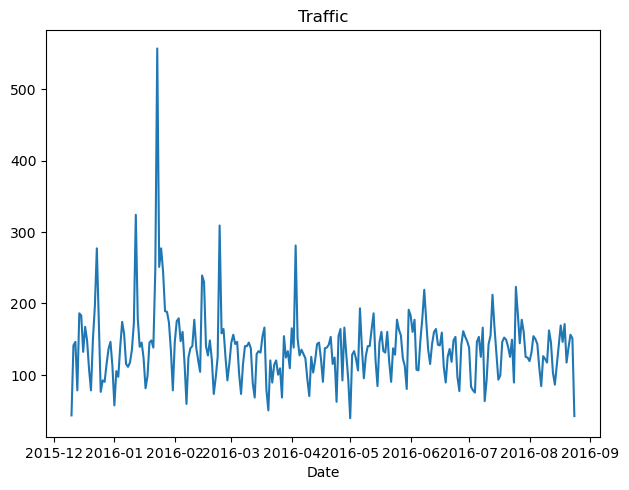

In [75]:
#add a condition and then make a group by clause for date and need only latitude
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

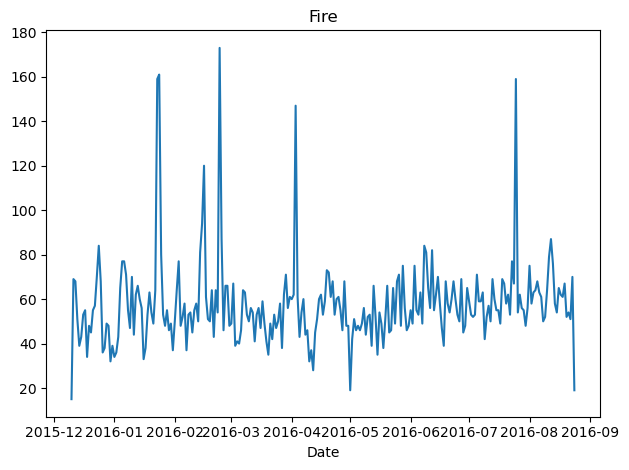

In [77]:
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

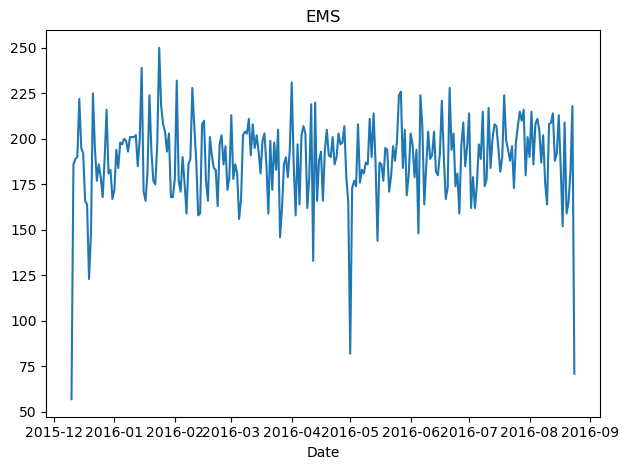

In [82]:
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [100]:
#Unstack method
#try to read the documentation fro this Unstacking the data

dayhour=df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()

<Axes: xlabel='Hour', ylabel='Day of Week'>

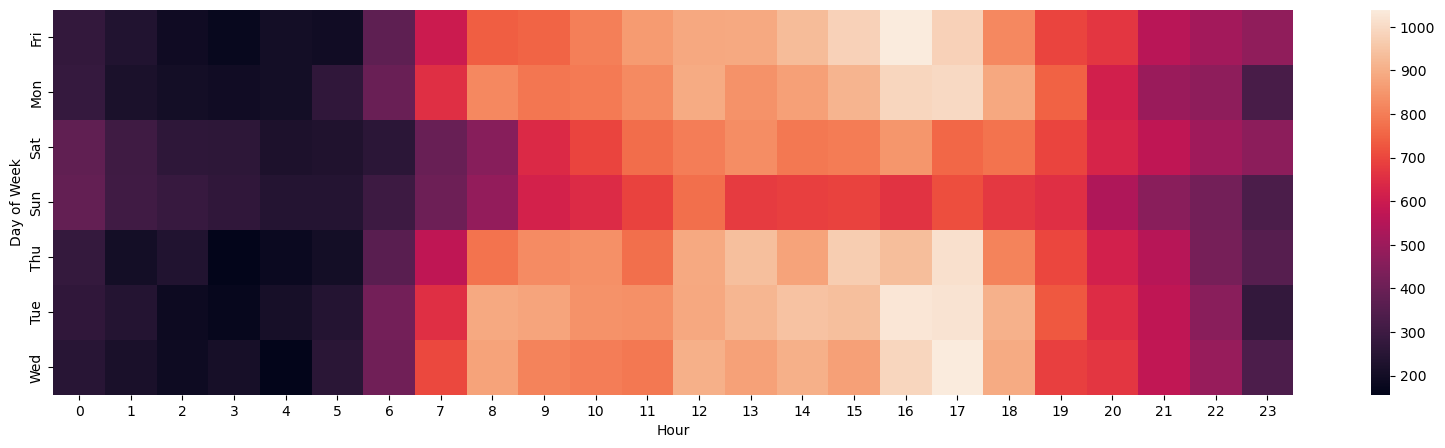

In [110]:
plt.figure(figsize=(20,5))
sns.heatmap(data=dayhour)

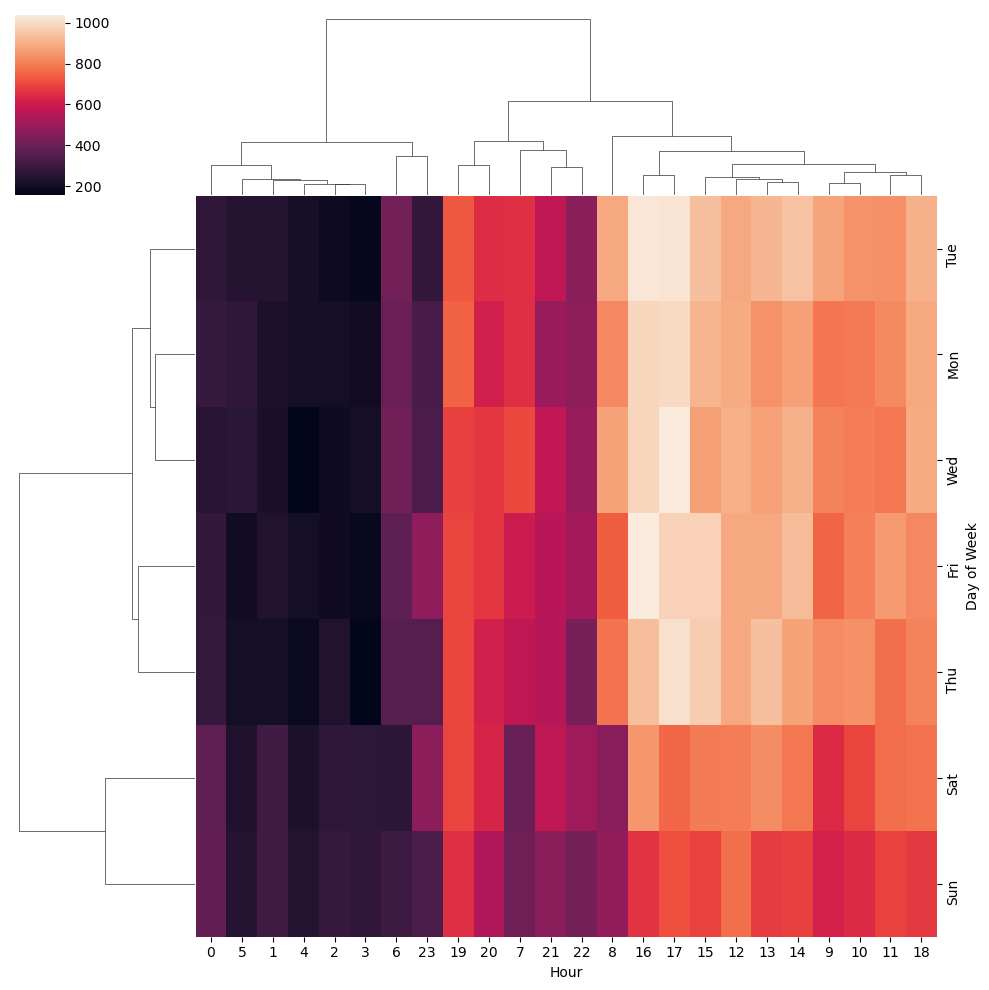

In [116]:
sns.clustermap(data=dayhour)

<Axes: xlabel='Month', ylabel='Day of Week'>

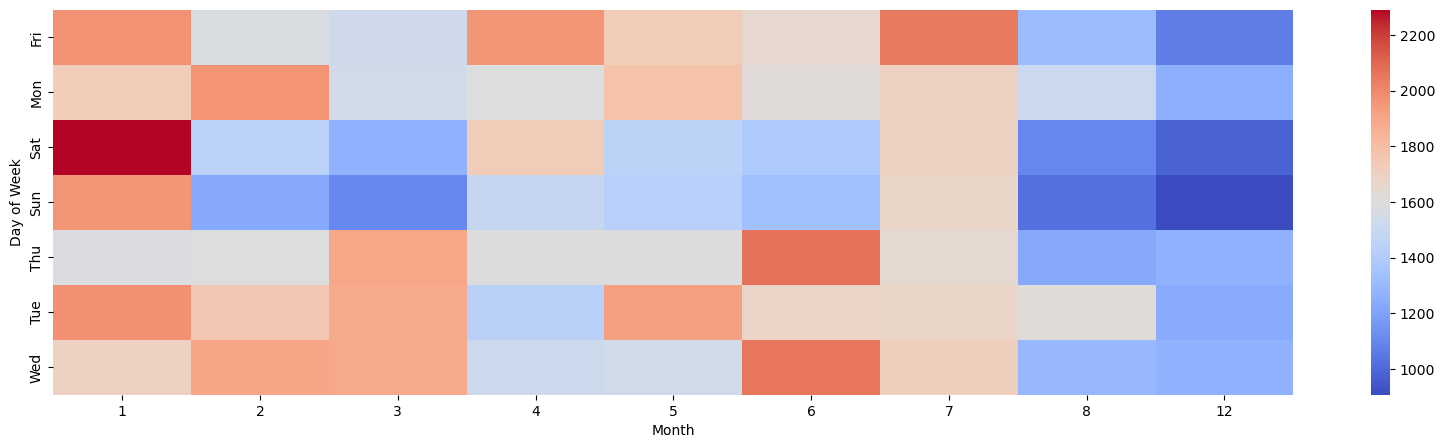

In [119]:
dayMonth=df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
plt.figure(figsize=(20,5))
sns.heatmap(data=dayMonth,cmap='coolwarm')

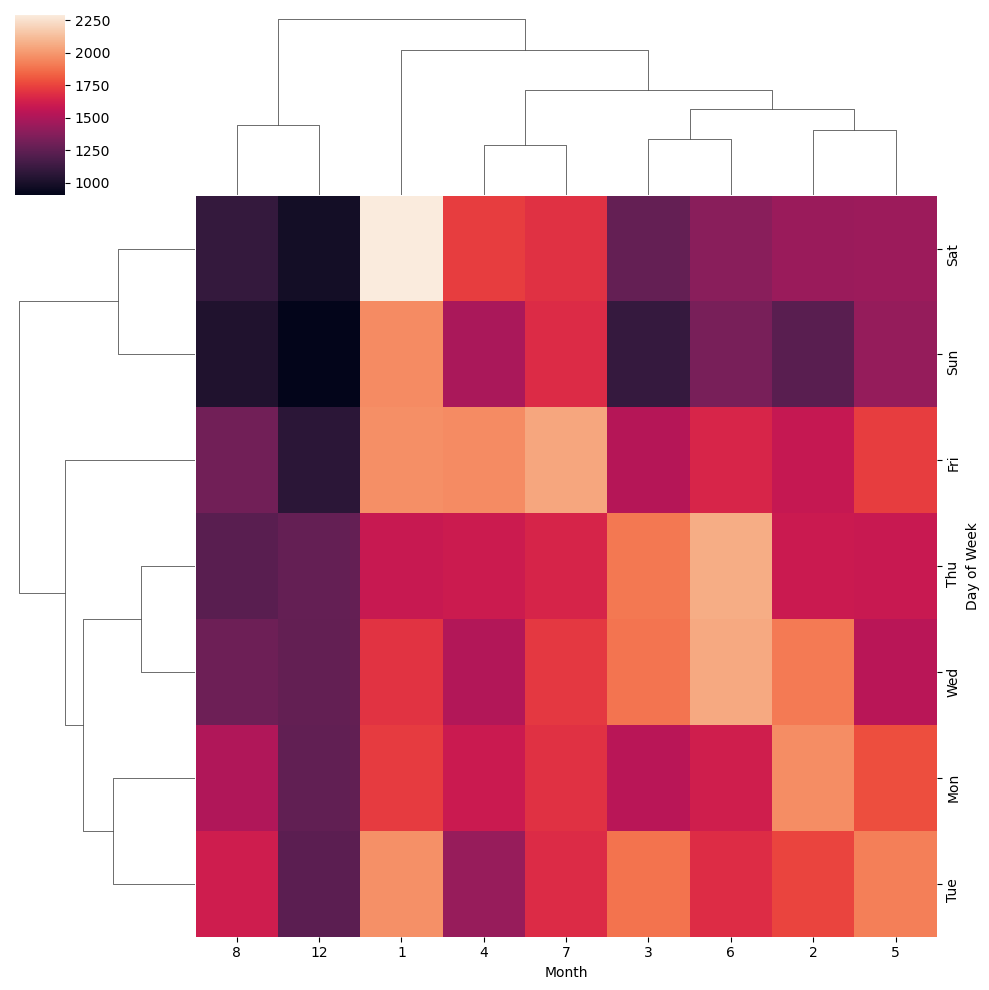

In [120]:
sns.clustermap(data=dayMonth)